# Take Home Assignment: <br> <br> **` Beer Data Science Project `**
### Name: `Abhinandan Pise`
### emailID: `abhipise5321@gmail.com`

<img src="Table_of_Content.png">

<img src="Table_of_Content_2.png">

# 1: Basic Preprocessing & Data Cleaning

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1: Data Reading using Pandas DataFrame

In [2]:
data=pd.read_csv('BeerDataScienceProject.csv',encoding='latin-1')

In [3]:
data.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097


## 1.2: Number Datapoints & Columns in the Dataset

In [4]:
print("="*50)
print("Number of rows or Datapoints in the Datasets:",data.shape[0])
print("-"*50)
print("number of clumns in the datasets: ", data.shape[1])
print("="*50)

Number of rows or Datapoints in the Datasets: 528870
--------------------------------------------------
number of clumns in the datasets:  13


## 1.3: Colmuns Names & Datatype of Columns

In [5]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [6]:
data.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

## 1.4: Null Value Check  & Missing Value Imputation 

In [7]:
print("="*50)
print("Null values in the Dataset(Percentage):")
print("-"*50)
print(data.isnull().sum()/len(data)*100)
print("="*50)

Null values in the Dataset(Percentage):
--------------------------------------------------
beer_ABV              3.834591
beer_beerId           0.000000
beer_brewerId         0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_palette        0.000000
review_overall        0.000000
review_taste          0.000000
review_profileName    0.021744
review_aroma          0.000000
review_text           0.022501
review_time           0.000000
dtype: float64


In [8]:
print("="*80)
print("Mean Value of Feature beer_ABV(Alcohol by Volume):",data['beer_ABV'].mean())
print("-"*80)
print("Mean Value of Feature beer_ABV(Alcohol by Volume):",data['beer_ABV'].median())
print("="*80)

Mean Value of Feature beer_ABV(Alcohol by Volume): 7.017441593423365
--------------------------------------------------------------------------------
Mean Value of Feature beer_ABV(Alcohol by Volume): 6.5


In [9]:
#Mean Value Impute the Beer_ABV Feature
beer_ABV_mean=data['beer_ABV'].mean()

data['beer_ABV'].fillna(value=beer_ABV_mean,inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
print("="*50)
print("Null values in the Dataset(Percentage):")
print("-"*50)
print(data.isnull().sum()/len(data)*100)
print("="*50)

Null values in the Dataset(Percentage):
--------------------------------------------------
beer_ABV              0.0
beer_beerId           0.0
beer_brewerId         0.0
beer_name             0.0
beer_style            0.0
review_appearance     0.0
review_palette        0.0
review_overall        0.0
review_taste          0.0
review_profileName    0.0
review_aroma          0.0
review_text           0.0
review_time           0.0
dtype: float64


<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. As There are 3.83% Values Missing in the Beer_ABV Column that are replaced by the mean of colmun <br>
2. Features like 'review_profileName' & "review_text" Very low Percentage missing values so dropped (row droppped) <br> 
</font>

# 2: Exploratary Data Analysis & Data Visualization 

## 2.1: Basic Statistics of all the Features

In [12]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
beer_ABV,528636.0,7.017402e+00,2.161832e+00,1.000000e-02,5.300000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerId,528636.0,2.210187e+04,2.215998e+04,3.000000e+00,1.745000e+03,1.437800e+04,4.052800e+04,7.731000e+04
beer_brewerId,528636.0,2.598903e+03,5.282495e+03,1.000000e+00,1.320000e+02,3.940000e+02,1.475000e+03,2.798000e+04
review_appearance,528636.0,3.864509e+00,6.039861e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palette,528636.0,3.758944e+00,6.852722e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_overall,528636.0,3.833179e+00,7.099392e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_taste,528636.0,3.765985e+00,6.689742e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_aroma,528636.0,3.817346e+00,7.188361e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_time,528636.0,1.224890e+09,7.605932e+07,8.843904e+08,1.174617e+09,1.240371e+09,1.288564e+09,1.326277e+09


In [13]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

## 2.2: Distribution  of the  Features & Its Visualizaiton 

Text(0.5, 0, 'beer_ABV(Alcohol by Volume)')

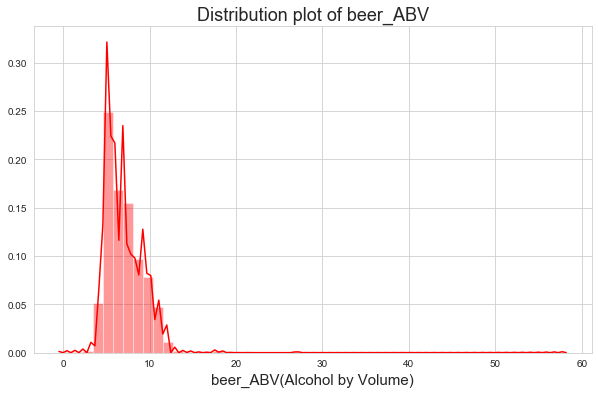

In [14]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(a=data['beer_ABV'],color="r")
plt.title("Distribution plot of beer_ABV",fontsize=18)
plt.xlabel(f"beer_ABV(Alcohol by Volume)",fontsize='15')

<font color=blue>*__OBSERVATION:__*<br>
From Above Distribution Plot Analysis,<br>
1. BeerABV: Disribution is right Skewed so we can say there are outlier towards the extreme positive values <br>
</font>

In [15]:
reviews_all_f=['review_appearance','review_palette',
          'review_overall','review_taste',
          'review_aroma']
for i in reviews_all_f:
    print("="*50)
    print(f"Value counts(%) for the feature {i}:")
    print("-"*50)
    print(data[i].value_counts(normalize=True)*100)
    print("="*50)

Value counts(%) for the feature review_appearance:
--------------------------------------------------
4.0    42.750777
3.5    19.615577
4.5    19.008732
3.0    10.054934
5.0     4.367277
2.5     2.318230
2.0     1.420448
1.5     0.305692
1.0     0.157765
0.0     0.000567
Name: review_appearance, dtype: float64
Value counts(%) for the feature review_palette:
--------------------------------------------------
4.0    35.640214
3.5    22.710523
4.5    17.756831
3.0    12.217859
5.0     4.219160
2.5     3.957354
2.0     2.461618
1.5     0.677025
1.0     0.359416
Name: review_palette, dtype: float64
Value counts(%) for the feature review_overall:
--------------------------------------------------
4.0    37.165649
4.5    20.974357
3.5    18.702472
3.0    10.153868
5.0     5.864338
2.5     3.503923
2.0     2.256373
1.5     0.755529
1.0     0.622924
0.0     0.000567
Name: review_overall, dtype: float64
Value counts(%) for the feature review_taste:
-----------------------------------------------

<font color=blue>*__OBSERVATION:__*<br>
From Above  Analysis,<br>
1. All Reviews:  Review number 4 is got the most % share in all reviews  <br>
</font>

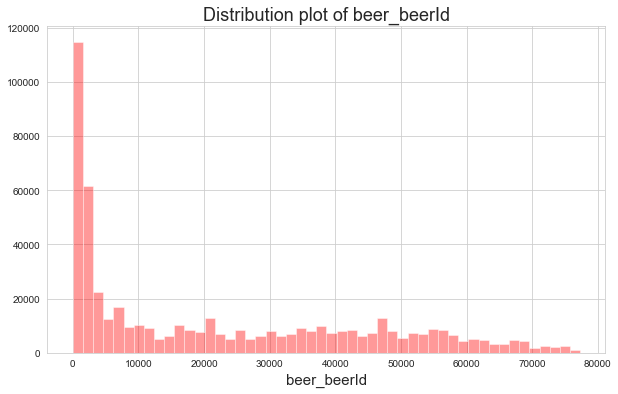

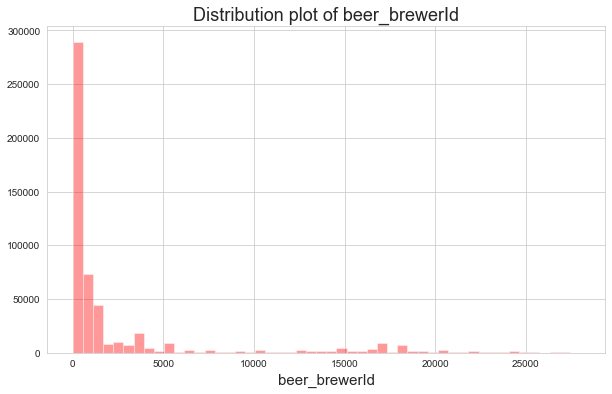

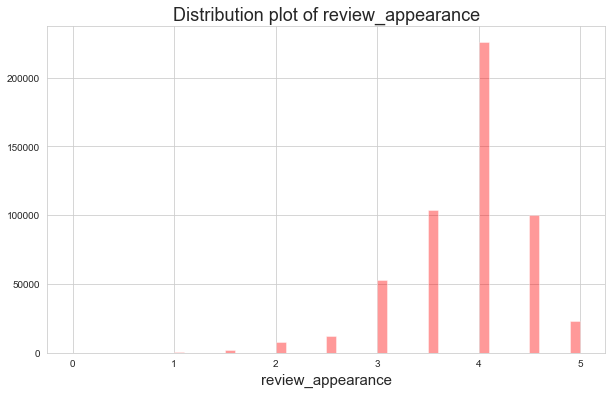

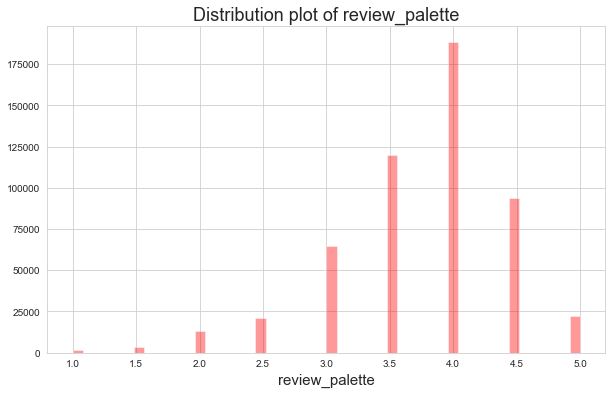

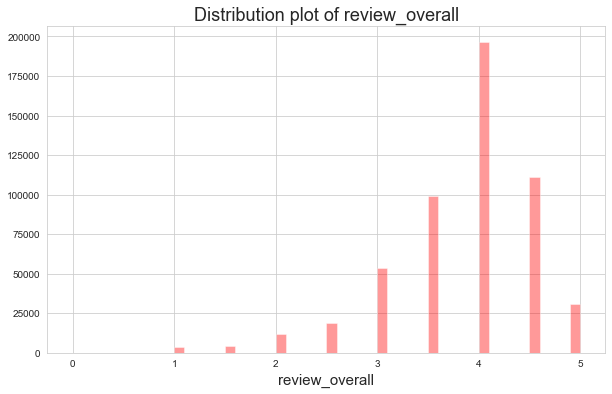

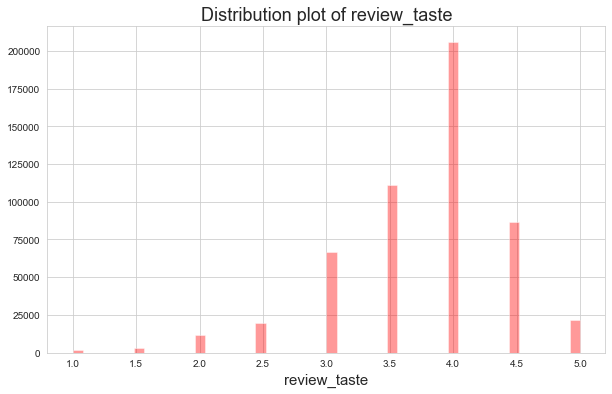

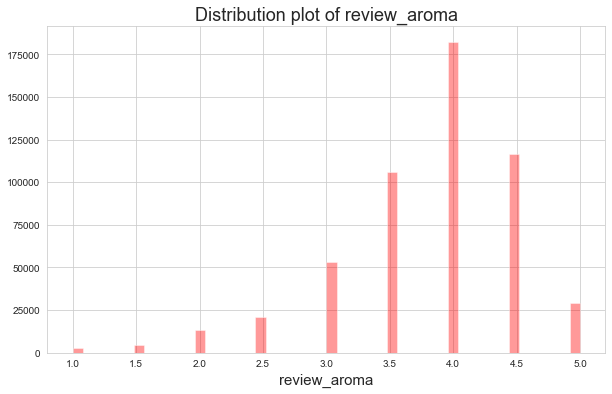

In [16]:
col_list=['beer_beerId','beer_brewerId',
          'review_appearance','review_palette',
          'review_overall','review_taste',
          'review_aroma']

for i in col_list:
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    sns.distplot(a=data[i],color="r",kde=False)
    plt.title("Distribution plot of {}".format(i),fontsize=18)
    plt.xlabel(f"{i}",fontsize='15')

<font color=blue>*__OBSERVATION:__*<br>
From Above Distribution Plot Analysis,<br>
1. For beer_beerId & beer_brewerId : From Distribution plot is concentrcetaed for very few IDs & very few occurences are for IDs on right right skewed nature  <br>
2. All Reviews: From Distrubtion plot we can observe Review number 4 is occuring most time <br> 
</font>

## 2.3: Boxplot of Feature BeerABV

In [17]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

Text(0, 0.5, 'beer_ABV')

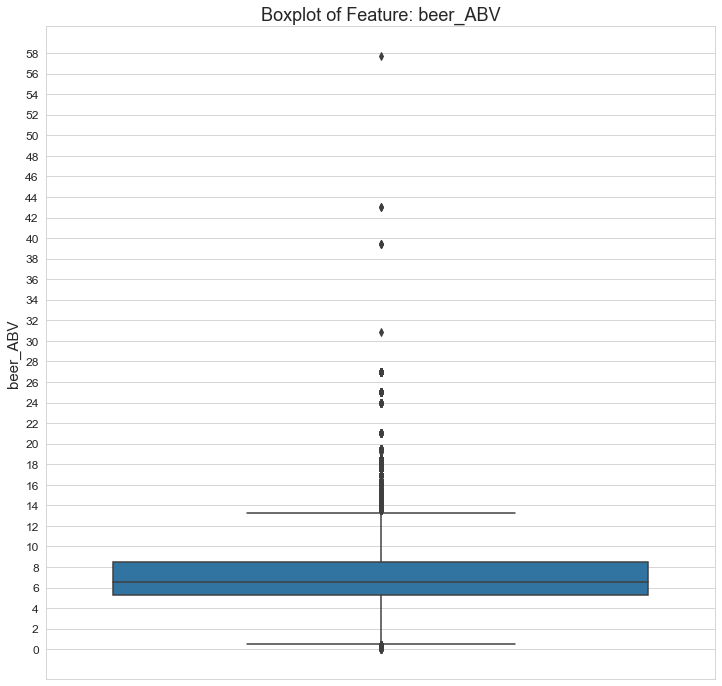

In [18]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
sns.boxplot(y=data['beer_ABV'],data=data)
plt.yticks(np.arange(0,60,2),fontsize=12)
plt.title("Boxplot of Feature: beer_ABV",fontsize=18)
plt.ylabel("beer_ABV",fontsize=15)

<font color=blue>*__OBSERVATION:__*<br>
From Above Box Plot Analysis,<br>
1. Outlier exists in the positive side of the plot & it goes upto 60% ABV   <br> 
2. From graph we can observe Interquantile range for Beer_ABV is appr. 5% to 8.5% (Q3-Q1)(<font color=red>same conclusion can be drawn from the pandas.df.describe() functionality )</font> <br>
</font>

## 2.4: Total Number of Different beerIDs & Its Counts

In [19]:
print("="*60)
print("Total Number of Different beerIDs:",data['beer_beerId'].nunique())
print("="*60)

Total Number of Different beerIDs: 20200


In [20]:
print("="*60)
print("Total Number of Counts for each beer_beerId (top 10)")
print("-"*60)
print(data['beer_beerId'].value_counts().head(10))
print("="*60)
print("Percentage for each beer_beerId (top 10)")
print("-"*60)
print(data['beer_beerId'].value_counts(normalize=True).head(10)*100)
print("="*60)

Total Number of Counts for each beer_beerId (top 10)
------------------------------------------------------------
1904     2998
276      2586
11757    2501
2671     2491
34       2480
104      2416
355      2229
645      2170
30420    2028
571      2024
Name: beer_beerId, dtype: int64
Percentage for each beer_beerId (top 10)
------------------------------------------------------------
1904     0.567120
276      0.489183
11757    0.473104
2671     0.471213
34       0.469132
104      0.457025
355      0.421651
645      0.410490
30420    0.383629
571      0.382872
Name: beer_beerId, dtype: float64


In [21]:
df_beer_beerId=pd.DataFrame(data['beer_beerId'].value_counts())
len(df_beer_beerId[(df_beer_beerId["beer_beerId"]<10)])/len(df_beer_beerId)*100

78.76732673267327

<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. Total Number of Different beerIDs: 20200  <br> 
2. beerIDs:1904 contributes 2998 values with % of 0.567120% 
3. beer_beerIds 78.76% having less than 10 counts <br>
</font>

## 2.5: Total Number of Different brewerIds & Its Counts

In [22]:
print("="*60)
print("Total Number of different brewerID:",data['beer_brewerId'].nunique())
print("="*60)

Total Number of different brewerID: 1803


In [23]:
print("="*60)
print("Total Number of Counts for each brewerID (top 10)")
print("-"*60)
print(data['beer_brewerId'].value_counts().head(10))
print("="*60)
print("Percentage for each brewerID (top 10)")
print("-"*60)
print(data['beer_brewerId'].value_counts(normalize=True).head(10)*100)
print("="*60)

Total Number of Counts for each brewerID (top 10)
------------------------------------------------------------
35      39431
140     28741
132     24070
1199    19990
3818    15863
158     14928
22      13906
192     13405
392     12241
694     11838
Name: beer_brewerId, dtype: int64
Percentage for each brewerID (top 10)
------------------------------------------------------------
35      7.459008
140     5.436822
132     4.553228
1199    3.781430
3818    3.000742
158     2.823871
22      2.630544
192     2.535771
392     2.315582
694     2.239348
Name: beer_brewerId, dtype: float64


In [24]:
df_beer_brewerId=pd.DataFrame(data['beer_brewerId'].value_counts())
len(df_beer_brewerId[(df_beer_brewerId["beer_brewerId"]<10)])/len(df_beer_brewerId)*100

44.42595673876872

<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. Total Number of Different beer_brewerId: 1803  <br> 
2. beer_brewerId:35 contributes 2998 values with % of 7.45% 
3. beer_brewerId 44.42% having less than 10 counts <br>
</font>

## 2.6: Total Number of Different Beer_Name & Its Counts

In [25]:
print("="*60)
print("Total Number of different beer_name:",data['beer_name'].nunique())
print("="*60)

Total Number of different beer_name: 18339


In [26]:
print("="*60)
print("Total Number of Counts for each beer_name (top 10)")
print("-"*60)
print(data['beer_name'].value_counts().head(10))
print("="*60)
print("Percentage for each beer_name (top 10)")
print("-"*60)
print(data['beer_name'].value_counts(normalize=True).head(10)*100)
print("="*60)

Total Number of Counts for each beer_name (top 10)
------------------------------------------------------------
Sierra Nevada Celebration Ale                 2998
Sierra Nevada Pale Ale                        2586
Founders Breakfast Stout                      2501
Sierra Nevada Bigfoot Barleywine Style Ale    2491
La Fin Du Monde                               2480
Samuel Adams Boston Lager                     2416
Chocolate Stout                               2253
Dead Guy Ale                                  2229
Trappistes Rochefort 10                       2170
Sierra Nevada Torpedo Extra IPA               2028
Name: beer_name, dtype: int64
Percentage for each beer_name (top 10)
------------------------------------------------------------
Sierra Nevada Celebration Ale                 0.567120
Sierra Nevada Pale Ale                        0.489183
Founders Breakfast Stout                      0.473104
Sierra Nevada Bigfoot Barleywine Style Ale    0.471213
La Fin Du Monde             

In [27]:
df_beer_name=pd.DataFrame(data['beer_name'].value_counts())
len(df_beer_name[(df_beer_name["beer_name"]<10)])/len(df_beer_name)*100

76.79262773324609

<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. Total Number of Different beer_name: 18339  <br> 
2. beer_name:'Sierra Nevada Celebration Ale' contributes 2998 values with % of 0.56% 
3. beer_name: 76.79% having less than 10 counts <br>
</font>

## 2.7: Total Number of Different beer_style & Its Counts

In [28]:
print("="*60)
print("Total Number of different beer_style:",data['beer_style'].nunique())
print("="*60)

Total Number of different beer_style: 104


In [29]:
print("="*60)
print("Total Number of Counts for each beer_style (top 10)")
print("-"*60)
print(data['beer_style'].value_counts().head(10))
print("="*60)
print("Percentage for each beer_style (top 10)")
print("-"*60)
print(data['beer_style'].value_counts(normalize=True).head(10)*100)
print("="*60)

Total Number of Counts for each beer_style (top 10)
------------------------------------------------------------
American IPA                        43358
American Double / Imperial IPA      26092
American Double / Imperial Stout    23346
American Pale Ale (APA)             20511
American Amber / Red Ale            18725
Russian Imperial Stout              17181
American Porter                     16597
Belgian Strong Dark Ale             15398
Fruit / Vegetable Beer              15144
Witbier                             13528
Name: beer_style, dtype: int64
Percentage for each beer_style (top 10)
------------------------------------------------------------
American IPA                        8.201863
American Double / Imperial IPA      4.935721
American Double / Imperial Stout    4.416271
American Pale Ale (APA)             3.879985
American Amber / Red Ale            3.542135
Russian Imperial Stout              3.250062
American Porter                     3.139589
Belgian Strong Dark 

<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. Total Number of different beer_style: 104 <br> 
2. beer_style.:'American IPA' contributes 2998 values with % of 8.2% 
<br>
</font>

## 2.8: Total Number of Different review_profileName & Its Counts

In [30]:
print("="*60)
print("Total Number of different review_profileName:",data['review_profileName'].nunique())
print("="*60)

Total Number of different review_profileName: 22789


In [31]:
print("="*60)
print("Total Number of Counts for each review_profileName (top 10)")
print("-"*60)
print(data['review_profileName'].value_counts().head(10))
print("="*60)
print("Percentage for each review_profileName (top 10)")
print("-"*60)
print(data['review_profileName'].value_counts(normalize=True).head(10)*100)
print("="*60)

Total Number of Counts for each review_profileName (top 10)
------------------------------------------------------------
northyorksammy    1858
mikesgroove       1403
BuckeyeNation     1298
womencantsail     1238
Phyl21ca          1164
ChainGangGuy      1155
Thorpe429         1042
brentk56          1026
NeroFiddled       1012
feloniousmonk     1008
Name: review_profileName, dtype: int64
Percentage for each review_profileName (top 10)
------------------------------------------------------------
northyorksammy    0.351471
mikesgroove       0.265400
BuckeyeNation     0.245538
womencantsail     0.234188
Phyl21ca          0.220189
ChainGangGuy      0.218487
Thorpe429         0.197111
brentk56          0.194084
NeroFiddled       0.191436
feloniousmonk     0.190679
Name: review_profileName, dtype: float64


In [32]:
df_review_profileName=pd.DataFrame(data['review_profileName'].value_counts())
len(df_review_profileName[(df_review_profileName["review_profileName"]<10)])/len(df_review_profileName)*100

71.57839308438282

<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. Total Number of different review_profileName: 22800  <br> 
2. review_profileName:'northyorksammy' contributes 1858 values with % of 0.0.35% 
3. review_profileName: 71.57% having less than 10 counts <br>
</font>

## 2.9: Numerical, Categorical & Text Feature Check

In [33]:
data.select_dtypes(include=['object']).columns.tolist()

['beer_name', 'beer_style', 'review_profileName', 'review_text']

In [34]:
print(data.select_dtypes(exclude=['object']).columns.tolist())

['beer_ABV', 'beer_beerId', 'beer_brewerId', 'review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma', 'review_time']


<font color=blue>*__OBSERVATION:__*<br>
From Above Analysis,<br>
1. Numerical Features:'beer_ABV' <br>
2. Categorical Feature(numbers from 0 to 5):'review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma' <br>
3. Categorical Feature: 'beer_beerId', 'beer_brewerId','Beer_Name','beer_style', 'review_profileName' <br> 
4. Time Feature :'review_time'<br>
5. Text Feature :'review_text'<br>
</font>

# 3: Assessment Questions 

## 3.1: Q1- Rank Top 3 Breweries which produce the strongest beers?

### 3.1.1: Q1- Approach 1

In [35]:
df_strongest_beer=data.groupby("beer_brewerId")["beer_ABV"].max()

In [36]:
df_strongest_beer_final=pd.DataFrame(df_strongest_beer).sort_values(by=['beer_ABV'],ascending=False).reset_index()[0:3]

In [37]:
df_strongest_beer_final

,beer_brewerId,beer_ABV
0,6513,57.7
1,35,27.0
2,2958,19.5


In [38]:
df_strongest_beer_final.index=df_strongest_beer_final['beer_brewerId']

In [39]:
df_strongest_beer_final.columns

Index(['beer_brewerId', 'beer_ABV'], dtype='object')

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text yticklabel objects>)

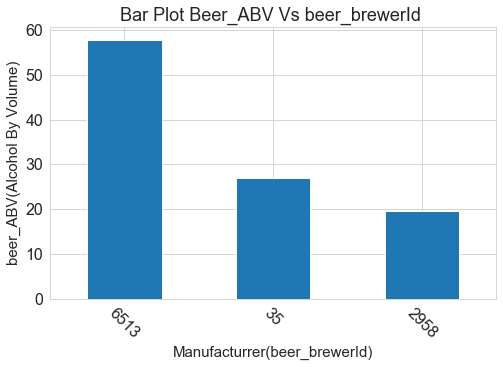

In [40]:
df_strongest_beer_final['beer_ABV'].plot(kind='bar',
                                         x=df_strongest_beer_final['beer_brewerId'],
                                         figsize=(8,5))
plt.title('Bar Plot Beer_ABV Vs beer_brewerId ',fontsize=18)
plt.xlabel("Manufacturrer(beer_brewerId)",fontsize=15)
plt.ylabel("beer_ABV(Alcohol By Volume)",fontsize=15)
plt.xticks(fontsize=16,rotation=-45)
plt.yticks(fontsize=16)

<font color=blue>*__Observation/Conclusion__*<br>
Top 3 Breweries which produce the strongest beers<br>
     a. beer_brewerId:6513 & beer_ABV(Alcohol_by_Volume):57.7% <br>
     b. beer_brewerId:35 & beer_ABV(Alcohol_by_Volume):27% <br>
     c. beer_brewerId:2958 & beer_ABV(Alcohol_by_Volume):19.5% <br>
            </font>

### 3.1.2: Q1- Approach 2

In [41]:
brewer_id_list=data.groupby("beer_ABV").first().tail(50)["beer_brewerId"].tolist()[::-1]
unique_brewer_id=[]
for i in brewer_id_list:
    if i in unique_brewer_id:
        pass
    else:
        unique_brewer_id.append(i)

unique_brewer_id[0:3]
    

[6513, 35, 16866]

<font color=blue>*__Observation/Conclusion__*<br>
Top 3 Breweries which produce the strongest beers Approach 2 <br>
     a. beer_brewerId:6513  <br>
     b. beer_brewerId:35  <br>
     c. beer_brewerId:2958  <br>
Note:By Approach 2 we getting only BrewerIDs
            </font>

## 3.2: Q2-Which year did beers enjoy the highest ratings?

### 3.2.1: Q2-Approach 1 

In [42]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [43]:
data["review_time"]

0         1234817823
1         1235915097
2         1235916604
3         1234725145
4         1293735206
             ...    
528865    1205212721
528866    1203490783
528867    1201320897
528868    1201215290
528869    1200336367
Name: review_time, Length: 528636, dtype: int64

In [44]:
pd.to_datetime(data['review_time'], unit='s')

0        2009-02-16 20:57:03
1        2009-03-01 13:44:57
2        2009-03-01 14:10:04
3        2009-02-15 19:12:25
4        2010-12-30 18:53:26
                 ...        
528865   2008-03-11 05:18:41
528866   2008-02-20 06:59:43
528867   2008-01-26 04:14:57
528868   2008-01-24 22:54:50
528869   2008-01-14 18:46:07
Name: review_time, Length: 528636, dtype: datetime64[ns]

In [45]:
data["date"]=pd.to_datetime(data['review_time'], unit='s')

In [46]:
pd.DatetimeIndex(data['date']).year

Int64Index([2009, 2009, 2009, 2009, 2010, 2012, 2011, 2011, 2010, 2010,
            ...
            2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008],
           dtype='int64', name='date', length=528636)

In [47]:
data['year']=pd.DatetimeIndex(data['date']).year

In [48]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'date', 'year'],
      dtype='object')

In [49]:
df_year_review=pd.DataFrame(data.groupby('year')['review_overall'].mean())

In [50]:
df_year_review.columns

Index(['review_overall'], dtype='object')

In [51]:
df_year_review.sort_values(by='review_overall',ascending=False).index[0]

2000

### 3.2.2: Q2-Approach 2 

In [52]:
#df_year_review['year'] = df_year_review.index

In [53]:
df_year_review.head(2)

,review_overall
year,
1998,3.891304
1999,4.000000


In [54]:
df_year_review['review_overall']==df_year_review['review_overall'].max()

year
1998    False
1999    False
2000     True
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
Name: review_overall, dtype: bool

In [55]:
df_year_review_final=df_year_review[df_year_review['review_overall']==df_year_review['review_overall']]

In [56]:
df_year_review_final.head()

,review_overall
year,
1998,3.891304
1999,4.000000
2000,4.181818
2001,3.927741
2002,3.798905


In [57]:
df_year_review_final.head().index

Int64Index([1998, 1999, 2000, 2001, 2002], dtype='int64', name='year')

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text yticklabel objects>)

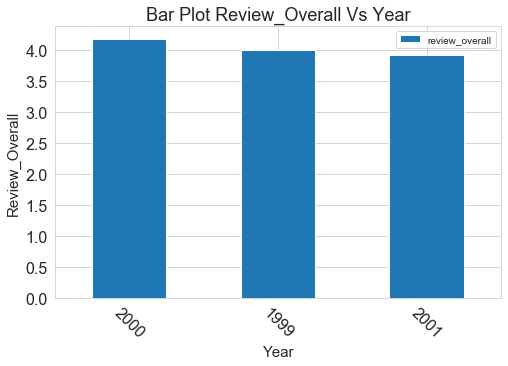

In [58]:
df_year_review_final.sort_values("review_overall",
                                 ascending=False).head(3).plot(kind='bar',
                                                              figsize=(8,5))
plt.title('Bar Plot Review_Overall Vs Year',fontsize=18)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Review_Overall",fontsize=15)
plt.xticks(fontsize=16,rotation=-45)
plt.yticks(fontsize=16)

<font color=blue>*__Observation/Conclusion__*<br>
From Above Bar Plot we clearly obeseve<br>
1. Year **__2000__** enjoy the highest overall ratings with mean of 4.18 ratings.  <br></font>

In [59]:
df_year_review_final=df_year_review[df_year_review['review_overall']==df_year_review['review_overall'].max()]

In [60]:
df_year_review_final

,review_overall
year,
2000,4.181818


<font color=blue>*__Observation/Conclusion__*<br>
1. Year **__2000__** enjoy the highest overall ratings with mean of 4.18 ratings.  <br></font>

## 3.3: Q3- Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

### 3.3.1: Q3 Approach 1 Correlation

In [61]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'date', 'year'],
      dtype='object')

In [62]:
df_reviews_all=data[['review_appearance', 'review_palette', 'review_overall', 'review_taste','review_aroma']]

In [63]:
df_reviews_all.head(2)

,review_appearance,review_palette,review_overall,review_taste,review_aroma
0,2.5,2.0,1.5,1.5,1.5
1,3.0,2.5,3.0,3.0,3.0


In [64]:
df_reviews_all.columns

Index(['review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_aroma'],
      dtype='object')

In [65]:
review_list_col=['review_appearance', 'review_palette', 'review_taste','review_aroma']
print("="*80)
for i in review_list_col:
    print("-"*80)
    print(f"Correlaion of review_overall with {i} is :",
          df_reviews_all['review_overall'].corr(df_reviews_all[i]))
    print("-"*80)
print("="*80)

--------------------------------------------------------------------------------
Correlaion of review_overall with review_appearance is : 0.4866815095411411
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Correlaion of review_overall with review_palette is : 0.6019481902309212
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Correlaion of review_overall with review_taste is : 0.6924322218759309
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Correlaion of review_overall with review_aroma is : 0.7829946894831371
--------------------------------------------------------------------------------


In [66]:
df_reviews_all.columns

Index(['review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_aroma'],
      dtype='object')

<font color=blue>*__Observation/Conclusion__*<br>
1. Correlaion of **__review_overall__** with **__review_aroma__** is : 0.78<br></font>

### 3.3.2: Q3 Approach 2-Correlation & Heatmap

In [67]:
df_reviews_all.head(2)

,review_appearance,review_palette,review_overall,review_taste,review_aroma
0,2.5,2.0,1.5,1.5,1.5
1,3.0,2.5,3.0,3.0,3.0


In [68]:
df_reviews_all.corr()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
review_appearance,1.000000,0.547641,0.486682,0.554804,0.534257
review_palette,0.547641,1.000000,0.601948,0.604250,0.706134
review_overall,0.486682,0.601948,1.000000,0.692432,0.782995
review_taste,0.554804,0.604250,0.692432,1.000000,0.725251
review_aroma,0.534257,0.706134,0.782995,0.725251,1.000000


In [69]:
corr_mask = np.triu(np.ones_like(df_reviews_all.corr(), dtype=bool))

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

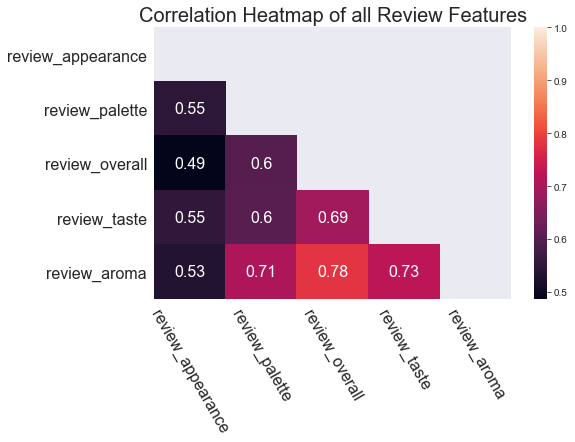

In [70]:
corr_mask = np.triu(np.ones_like(df_reviews_all.corr(), dtype=bool))
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
plt.title("Correlation Heatmap of all Review Features",fontsize=20)
sns.heatmap(df_reviews_all.corr(),mask=corr_mask,annot=True,annot_kws={"size": 16})
plt.xticks(fontsize=16,rotation=-60)
plt.yticks(fontsize=16)


<font color=blue>*__Observation/Conclusion__*<br>
1. From Above Correlation Plot bar Plot we can say that, <br> **__Review_overall__** & **__Review_Aroma__**  are most correlated features with correlation of 0.78 <br></font>

### 3.3.3: Q3 Approach 3-VIF: Variation Inflation Factor 

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_reviews_all.columns

In [73]:
vif_data["VIF"]=[variance_inflation_factor(df_reviews_all.values, i) for i in range((df_reviews_all.shape[1]))]

In [74]:
vif_data.sort_values("VIF",ascending=False,inplace=True)

In [75]:
vif_data

,feature,VIF
4,review_aroma,107.384740
2,review_overall,83.676943
3,review_taste,80.276929
1,review_palette,66.980315
0,review_appearance,54.669849


Text(0, 0.5, 'VIF value')

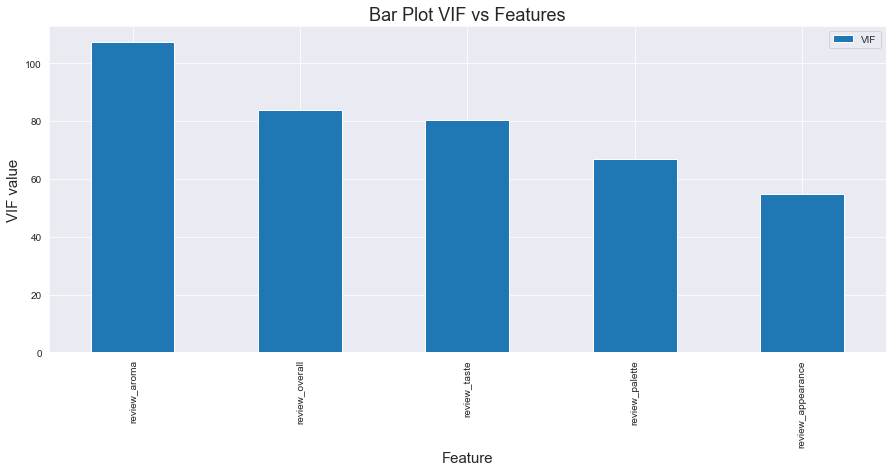

In [76]:
vif_data.plot(kind='bar',
              x="feature",
              figsize=(15,6))
plt.title("Bar Plot VIF vs Features",fontsize=18)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("VIF value",fontsize=15)

<font color=blue>*__Observation/Conclusion__*<br>
1. From Above VIF bar Plot we can say that **__Review_overall__** & **__Review_Aroma__**  are most correlated features <br></font>

## 3.4: Q4- If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

### 3.4.1 Q4- Approach 1 

In [77]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'date', 'year'],
      dtype='object')

In [78]:
df_beer_name_ol_review=data[['beer_name','review_overall']]

In [79]:
df_beer_name_ol_review.groupby('beer_name')["review_overall"].mean()

beer_name
"100" Pale Ale                            4.000000
"33" Export                               3.000000
"76" Anniversary Ale                      4.000000
"76" Anniversary Ale With English Hops    4.000000
"Fade To Black" Porter                    4.000000
                                            ...   
Über Pils                                 4.057018
ÜberFest Pilsner                          4.000000
ÜberSun (Imperial Summer Wheat Beer)      4.060086
à L'Agave Et Au Citron Vert               2.500000
überPils                                  3.857143
Name: review_overall, Length: 18339, dtype: float64

In [80]:
df_beer_name_ol_review.groupby('beer_name')["review_overall"].mean().sort_values(ascending=False).head(50)

beer_name
Fat Bottom Ale                                                    5.0
Schwindel Alt                                                     5.0
Quaker Oatmeal Stout                                              5.0
Kösslarn Hefeweisse                                               5.0
Celtic Red                                                        5.0
Yarmouth Town Brown                                               5.0
Cellar Door With Pineapple And Dry-hopped With Citra And Perle    5.0
Becken Beer Dunkel Bock                                           5.0
Boiler Room Golden Ale                                            5.0
Spicy Plum Sour Ale                                               5.0
Willamette Pale Ale                                               5.0
Sierra Nevada Oaked Imperial Porter                               5.0
HopCat Raging Centaur                                             5.0
Cauldron Brew                                                     5.0
Czechmate 

<font color=blue>*__Observation/Conclusion__*<br></font>
<font color=red> 1. Based on the Overall Review we cannot come to conclusion because all top beers is having Review_overall rating 5.  <br> </font>

### 3.4.2 Q4- Approach 2  with Beer_ABV & review_overall Feature

In [81]:
df_ABV_beer_name_ol_review=data[["beer_ABV",'beer_name','review_overall']]

In [82]:
df_ABV_beer_name_ol_review.head(2)

,beer_ABV,beer_name,review_overall
0,5.0,Sausa Weizen,1.5
1,6.2,Red Moon,3.0


In [83]:
df_best_beers=df_ABV_beer_name_ol_review \
              .groupby(('beer_name'))['review_overall',
                                      'beer_ABV'] \
                                      .mean() \
                                      .reset_index() \
                                      .sort_values(by=['review_overall',
                                                       'beer_ABV'],ascending=False)

In [84]:
df_best_beers.head(3)

,beer_name,review_overall,beer_ABV
582,AleSmith Speedway Stout - Oak Aged,5.0,12.0
12616,Pilot Series Imperial Sweet Stout - Palm Ridge...,5.0,12.0
1764,Bees Knees Barleywine,5.0,11.2


<font color=blue>*__Observation/Conclusion__*<br>
1. Based on the Reviews Overall Review & Alcohol by Volume(Beer_ABV) will recommmend the beer to friends as follows<br>
    a. AleSmith Speedway Stout - Oak Aged <br>
    b. Pilot Series Imperial Sweet Stout - Palm Ridge<br>
    c. Bees Knees Barleywine</font>

### 3.4.3 Q4- Approach 3 with all reviews & beer_ABV Features

In [85]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'date', 'year'],
      dtype='object')

In [86]:
'review_appearance', 'review_palette', 'review_taste','review_aroma'

('review_appearance', 'review_palette', 'review_taste', 'review_aroma')

In [87]:
df_ABV_beer_name_ol_review_1=data[['beer_name',
                                   'review_overall',
                                   'review_aroma',
                                   'review_taste',
                                   "review_appearance",
                                   "beer_ABV"]]

In [88]:
df_ABV_beer_name_ol_review_1.head(2)

,beer_name,review_overall,review_aroma,review_taste,review_appearance,beer_ABV
0,Sausa Weizen,1.5,1.5,1.5,2.5,5.0
1,Red Moon,3.0,3.0,3.0,3.0,6.2


In [89]:
df_best_beers_all=df_ABV_beer_name_ol_review_1 \
                  .groupby(('beer_name'))['review_overall',
                                          'review_aroma',
                                          'review_taste',
                                          "review_appearance",
                                          "beer_ABV"] \
                                                      .mean() \
                                                      .reset_index() \
                                                      .sort_values(by=['review_overall',
                                                                       'review_aroma',
                                                                       'review_taste',
                                                                       "review_appearance",
                                                                       "beer_ABV"],
                                                                   ascending=False)

In [90]:
df_best_beers_all.head(3)

,beer_name,review_overall,review_aroma,review_taste,review_appearance,beer_ABV
5394,Edsten Triple-Wit,5.0,5.0,5.0,5.0,10.0
11912,Old Gander Barley Wine,5.0,5.0,5.0,5.0,9.5
13725,Rogue Black Brutal,5.0,5.0,5.0,5.0,9.0


<font color=blue>*__Observation/Conclusion__*<br>
1. Based on the all Reviews & Alcohol by Volume(Beer_ABV) will recommmend the beer to friends as follows<br>
    a. Edsten Triple-Wit	<br>
    b. Old Gander Barley Wine <br>
    c. Rogue Black Brutal
</font>

## 3.5: Q5- Which Beer style seems to be the favorite based on reviews written by users?

### 3.5.1 Decontration Function

In [91]:
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
import re

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
    phrase = phrase.replace('\\r', ' ')
    phrase = phrase.replace('\\"', ' ')
    phrase = phrase.replace('\\n', ' ')
    return phrase

In [92]:
data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'date', 'year'],
      dtype='object')

In [93]:
data['review_text'].isna().sum()

0

In [94]:
%%time
data['cleaned_text']=data['review_text'].apply(decontracted)

Wall time: 1min 19s


In [95]:
data['cleaned_text'].head()

0    A lot of foam But a lot In the smell some bana...
1    Dark red color light beige foam average In the...
2    Almost totally black Beige foam quite compact ...
3    Golden yellow color White compact foam quite c...
4    According to the website the style for the Cal...
Name: cleaned_text, dtype: object

In [96]:
data['cleaned_text']=data['cleaned_text'].apply(lambda text: text.lower()) 

In [97]:
data['cleaned_text'].head()

0    a lot of foam but a lot in the smell some bana...
1    dark red color light beige foam average in the...
2    almost totally black beige foam quite compact ...
3    golden yellow color white compact foam quite c...
4    according to the website the style for the cal...
Name: cleaned_text, dtype: object

### 3.5.2 Stop Word Removal

In [98]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're']

In [99]:
data['cleaned_text']=data['cleaned_text'].apply(lambda text: " ".join([word for word in text.split() if word not in stopwords]))

In [100]:
data['cleaned_text'].head()

0    lot foam lot smell banana lactic tart not good...
1    dark red color light beige foam average smell ...
2    almost totally black beige foam quite compact ...
3    golden yellow color white compact foam quite c...
4    according website style caldera cauldron chang...
Name: cleaned_text, dtype: object

### 3.5.3 Vader Sentiment Analyzer

In [101]:
#topic:Vader_Sentiment vs TextBlob: https://pub.towardsai.net/textblob-vs-vader-for-sentiment-analysis-using-python-76883d40f9ae

In [102]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\DR SNEHAL
[nltk_data]     BANKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [103]:
data['text_sentiment_score'] = 0.0

In [104]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [105]:
data['cleaned_text'][0]

'lot foam lot smell banana lactic tart not good start quite dark orange color lively carbonation visible foam tending lactic sourness taste yeast banana'

In [106]:
sentiment_analyzer.polarity_scores(data['cleaned_text'][0])['compound']

0.1265

In [107]:
def vader_sentiment_ana(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

In [108]:
%%time
data['text_sentiment_score']=data['cleaned_text'].apply(vader_sentiment_ana)

Wall time: 18min 31s


In [109]:
data.tail(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,date,year,cleaned_text,text_sentiment_score
528868,7.017442,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290,2008-01-24 22:54:50,2008,purchased market cross pub carlisle pa one fri...,0.9221
528869,7.017442,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.0,4.0,jenbys2001,4.0,"I ordered a mug of this beer at Schnitzelhaus,...",1200336367,2008-01-14 18:46:07,2008,ordered mug beer schnitzelhaus local german re...,0.8610


In [110]:
#data.to_csv("Cleaned_Beer_Dataset.csv")

In [111]:
pd.DataFrame(data.groupby('beer_style')['text_sentiment_score'].mean().sort_values(ascending=False)).head(2)

,text_sentiment_score
beer_style,
Braggot,0.863941
Quadrupel (Quad),0.863022


<font color=blue>*__Observation/Conclusion__*<br>
1. Review Text Sentiment is calculated using Vader Sentiment Analyzer<br>
2. For the *__Braggot__* beer_style, the average senitiment score is max i.e. 0.863941  <br>
</font>

## 3.6: Q6- How does written review compare to overall review score for the beer styles?

In [112]:
data.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,date,year,cleaned_text,text_sentiment_score
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 20:57:03,2009,lot foam lot smell banana lactic tart not good...,0.1265
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 13:44:57,2009,dark red color light beige foam average smell ...,0.4588


In [113]:
print("="*100)
print("Overall Correlation of Review Overall between Review_Text(Sentiment_Score)")
print("-"*100)
print(data['review_overall'].corr(data['text_sentiment_score']))
print("="*100)

Overall Correlation of Review Overall between Review_Text(Sentiment_Score)
----------------------------------------------------------------------------------------------------
0.35463849509851525


In [114]:
df_sentiment_review_style=data.groupby('beer_style')['text_sentiment_score',
                                                     'review_overall'].mean(). \
                                                      sort_values(['text_sentiment_score',
                                                                   'review_overall'],ascending=False).reset_index()

In [115]:
df_sentiment_review_style.head(2)

,beer_style,text_sentiment_score,review_overall
0,Braggot,0.863941,3.645729
1,Quadrupel (Quad),0.863022,4.049371


In [116]:
print("="*100)
print("Correlation of Review Overall between Review_Text(Sentiment_Score) based on the Beer_Style:")
print("-"*100)
print(df_sentiment_review_style['review_overall'].corr(df_sentiment_review_style['text_sentiment_score']))
print("="*100)

Correlation of Review Overall between Review_Text(Sentiment_Score) based on the Beer_Style:
----------------------------------------------------------------------------------------------------
0.826573074280782


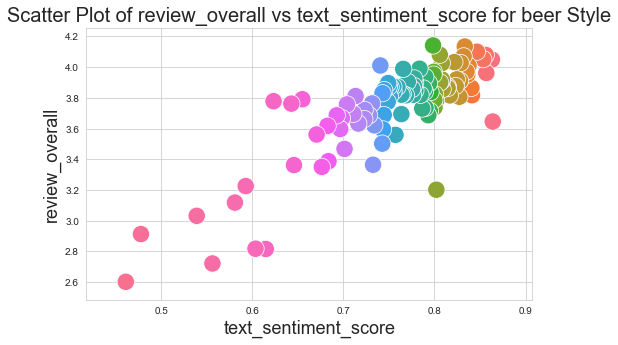

In [117]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.scatterplot(x=df_sentiment_review_style['text_sentiment_score'],
                y=df_sentiment_review_style['review_overall'],
                hue=df_sentiment_review_style['beer_style'],
                s=300)
plt.xlabel("text_sentiment_score",fontsize=18)
plt.ylabel("review_overall",fontsize=18)
plt.legend("",frameon=False)
plt.title("Scatter Plot of review_overall vs text_sentiment_score for beer Style",fontsize=20)
plt.show()

<font color=blue>*__Observation/Conclusion__*<br>
1. Correlation of Review Overall between Review_Text(Sentiment_Score) based on the Beer_Style:0.82657<br>
2. From Above Scatter Plot of review_overall vs text_sentiment_score for beer Style we can say that there is signifincat linear relation between the text review & review overall  <br>
</font>

## 3.7: Q7- How do find similar beer drinkers by using written reviews only?

In [118]:
data=pd.read_csv('Cleaned_Beer_Dataset.csv',encoding='latin-1')

In [119]:
data.columns

Index(['Unnamed: 0', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time', 'cleaned_text', 'text_sentiment_score'],
      dtype='object')

In [120]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['cleaned_text'].values)
review_text_features=count_vectorizer.transform(data['cleaned_text'].values)
review_text_features.get_shape() # get number of rows and columns in feature matrix.

Wall time: 2min 29s


(528636, 150420)

In [121]:
data.columns

Index(['Unnamed: 0', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time', 'cleaned_text', 'text_sentiment_score'],
      dtype='object')

In [122]:
from sklearn.metrics.pairwise import cosine_similarity

In [123]:
def bag_of_words_model(doc_id, num_results):
    """
    doc_id: Index of query datapoint
    num_results: Number of Datapoints similar to the Query datapoint
    """
    #the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    print('='*120)  
    print("beer_beerId of Query Datapoint :",data.iloc[doc_id]['beer_beerId'])
    print('-'*120)
    print("beer_name of Query Datapoint:",data.iloc[doc_id]['beer_name'])
    print('-'*120)
    print("Review Text of Query Datapoint :",data.iloc[doc_id]['cleaned_text'])
    print('='*120) 
    pairwise_dist = cosine_similarity(review_text_features,review_text_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[::-1][0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[::-1][0:num_results]    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):        
        print('beer_beerId of Similar Datapoint:',data['beer_beerId'].loc[df_indices[i]])
        print('-'*120)
        print ('beer_nameof Similar Datapoint:', data['beer_name'].loc[df_indices[i]])
        print('-'*120)
        print ('review_text of Similar Datapoint:', data['cleaned_text'].loc[df_indices[i]])
        print('-'*120)
        print ('Cosine similarity with the query point',pdists[i])
        print('='*120)

In [124]:
%%time
bag_of_words_model(4000, 5)

beer_beerId of Query Datapoint : 33624
------------------------------------------------------------------------------------------------------------------------
beer_name of Query Datapoint: Hoppin' To Heaven IPA
------------------------------------------------------------------------------------------------------------------------
Review Text of Query Datapoint : got de bierkoning amsterdam bomber snifter appearance pours bit 3 finger thick tight white head great retention perfectly clear higher active levels carbonation burnt orange color head slowly fades thick foam cap stays leaves lots nice lacing glass looks great way smell decent strength nose pale toasted malts citrus grapefruit hints lemon floral notes taste interesting spin one hops esters seem come front bitter grapefruit citrus lemon sweet malt shows middle caramel mostly pale toasted malts biscuit well good dose bitter floral hops finishes beginning middle seem backwards aftertaste bitter sweet lots pine grapefruit notes pr

<font color=blue>*__Observation/Conclusion__*<br>
1. For review text Similarity, Text is converted into BOW representation. <br>
2. Then cosine Similarity is calculated between the Query point & other Datapoint. <br>
3. For beerId of Query Datapoint : 33624 most similar datapoint is<br> beer_beerId : 47647 & beer_name: YuleSmith (Winter) <br>
</font>
<font color=red> **__Note:__** <br>(Approach 2):We can use Semantic Based Text Vectorizer for text Featurization like *__W2V__* , *__Sentence_Transformers__* & to reduce the time Complexity we can use *__FAISS__* similarity search<br></font>